#Import Module

In [11]:
#데이터전처리, 탐색, 분석
import pandas as pd
#수치해석
import numpy as np
#그래프 그려주는 것
import matplotlib.pyplot as plt

#Data Road
절대 경로 / 상대 경로
-웬만해선 상대경로 추천(다른 컴퓨터에서도 사용하기 위해서)

In [13]:
#train,test파일 불러오기
#pd.read_csv()= pandas에 들어있는 csv파일을 알려주는 함수
df_train = pd.read_csv('/content/drive/MyDrive/sw_coding/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/sw_coding/test.csv')
#상위 5개값 불러오기 #하위 5개값 불러오기 -> tail()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Exploration

In [15]:
#data size 확인
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [16]:
#Data Type 및 Null 확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
#null개수 확인하기
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
#unique값 확인하기/ 몇개의 종류인지 
df_train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [24]:
ratio = df_train["Survived"].value_counts()

In [29]:
labels=df_train["Survived"].unique()

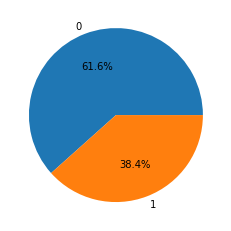

In [32]:
#원형그래프로 나타내기 #.1f 소수점 한자리수로 나타내기 1이 생존
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.show()

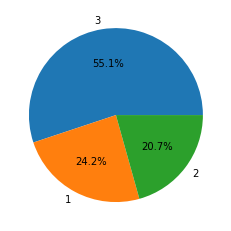

In [35]:
#등급별 인원수 확인하기
ratio = df_train["Pclass"].value_counts()
labels=df_train["Pclass"].unique()
#원형그래프로 나타내기 #.1f 소수점 한자리수로 나타내기
plt.pie(ratio,labels=labels,autopct="%.1f%%")
plt.show()

In [41]:
#"Pclass", "Survived" 그룹으로 묶어서 각 등극별 생존 비율 확인하기
df_train[["Pclass", "Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [42]:
#인원별 생존 비율 확인하기
df_train[["Sex", "Survived"]].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.742038
male,0.188908
